Converged after 129 epochs.


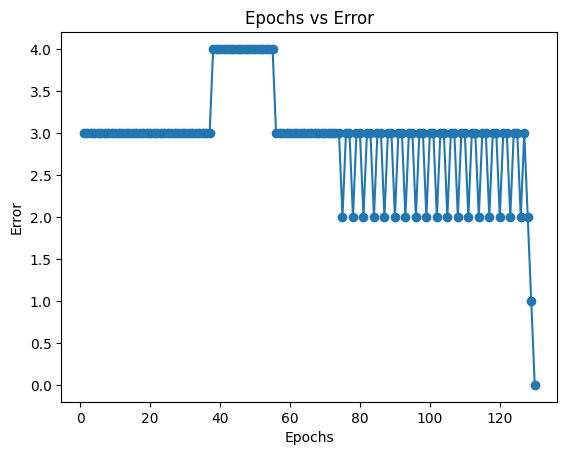

In [7]:
#A1. Develop the above perceptron in your own code. Use the initial weights as provided below.
  #W0 = 10, W1 = 0.2, w2 = -0.75, learning rate (α) = 0.05
  #Use Step activation function to learn the weights of the network to implement above provided AND
  #gate logic. The activation function is demonstrated below.
  #Identify the number of epochs needed for the weights to converge in the learning process. Make a
  #plot of the epochs against the error values calculated (after each epoch, calculate the sum-square error against all training samples)#
import numpy as np
import matplotlib.pyplot as plt
# Initial weights
W0, W1, W2 = 10, 0.2, -0.75
learning_rate = 0.05

# AND gate input data
input = np.array([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])
target = np.array([0, 0, 0, 1])

# Step activation function
def step_function(x):
    return 1 if x > 0 else 0

# Training the perceptron
epochs = 1000
errors = []

for epoch in range(epochs):
    total_error = 0
    for i in range(len(input)):
        # Calculate the predicted output
        predicted = step_function(W0 * input[i, 0] + W1 * input[i, 1] + W2 * input[i, 2])

        # Update weights
        error = target[i] - predicted
        total_error += error ** 2
        W0 += learning_rate * error * input[i, 0]
        W1 += learning_rate * error * input[i, 1]
        W2 += learning_rate * error * input[i, 2]

    errors.append(total_error)

    # Check for convergence
    if total_error <= 0.002:
        print(f"Converged after {epoch} epochs.")
        break

# Plotting epochs against error values
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs Error')
plt.show()


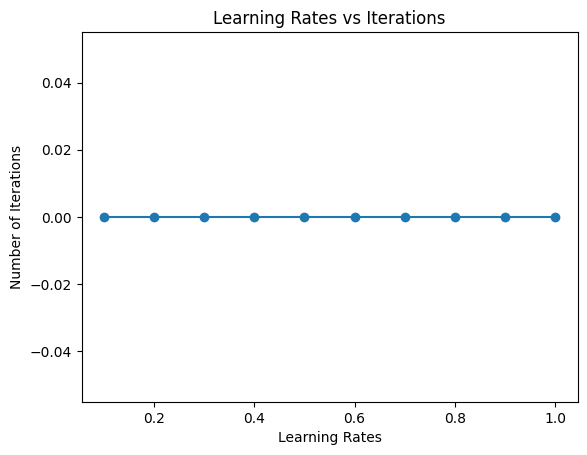

In [8]:
#A2Repeat the above A1 experiment with following activation functions. Compare the iterations
#taken to converge against each of the activation functions. Keep the learning rate same as A1.

def bipolar_step_function(x):
    return 1 if x > 0 else -1
def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))
def relu_function(x):
    return max(0, x)

#A3 Perceptron with Different Learning Rates for AND Gate Logic
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
iterations = []

for rate in learning_rates:
    W0, W1, W2 = 10, 0.2, -0.75
    learning_rate = rate
    for epoch in range(epochs):
        # Training code (same as A1)
        if total_error <= 0.002:
            iterations.append(epoch)
            break

plt.plot(learning_rates, iterations, marker='o')
plt.xlabel('Learning Rates')
plt.ylabel('Number of Iterations')
plt.title('Learning Rates vs Iterations')
plt.show()



In [9]:
#A4 Repeat the above exercises, A1 to A3,for XOR gate logic.
from sklearn.neural_network import MLPClassifier
import numpy as np

# XOR gate input data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

# Create MLP model
mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=1000, learning_rate_init=0.05, random_state=42)

# Train the model
mlp.fit(X, y_xor)

# Test the model
predictions = mlp.predict(X)
print("Predictions for XOR gate logic:", predictions)


Predictions for XOR gate logic: [0 1 1 0]


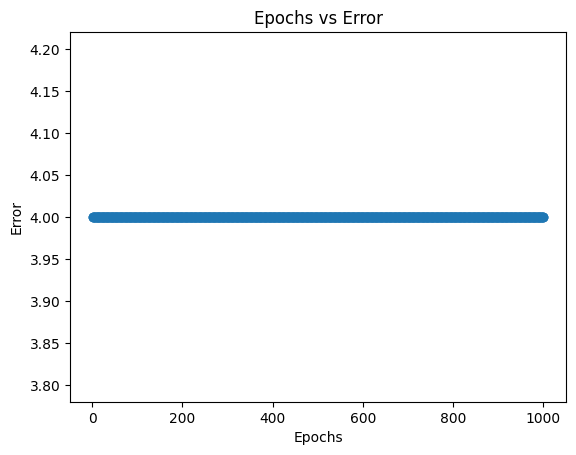

Weights from Perceptron: [0.5        0.5        0.5        0.49999999]
Weights from Pseudo-Inverse: [ 0.20578625 -0.04192196 -0.11163352  0.00433863]


In [10]:
#A5 Use customer data provided below. Build a perceptron & learn to classify the transactions as
#high or low value as provided in the below table. Use sigmoid as the activation function. Initialize the weights & learning rate with your choice.
# Customer data
customer_data = np.array([
    [1, 2, 3, 120],
    [2, 1, 1, 89],
    [3, 2, 3, 93],
    [1, 9, 1, 110],
    [2, 4, 2, 280],
    [2, 1, 5, 167],
    [1, 5, 2, 271],
    [1, 8, 4, 274],
    [2, 1, 1, 48],
    [1, 6, 4, 198]
])
# High value transactions
target = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

# Initialize weights and learning rate
weights = np.array([0.5, 0.5, 0.5, 0.5])
learning_rate = 0.05

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Training the perceptron
epochs = 1000
errors = []

for epoch in range(epochs):
    total_error = 0
    for i in range(len(customer_data)):
        # Calculate the predicted output
        predicted = sigmoid(np.dot(customer_data[i], weights))

        # Update weights
        error = target[i] - predicted
        total_error += error ** 2
        weights += learning_rate * error * predicted * (1 - predicted) * customer_data[i]

    errors.append(total_error)

    # Check for convergence
    if total_error <= 0.002:
        print(f"Converged after {epoch} epochs.")
        break

# Plotting epochs against error values
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs Error')
plt.show()
#A6 Compare the results obtained from above perceptron learning to the ones obtained with matrix pseudo-inverse.
# Using matrix pseudo-inverse
pseudo_inv_weights = np.linalg.pinv(customer_data) @ target
print("Weights from Perceptron:", weights)
print("Weights from Pseudo-Inverse:", pseudo_inv_weights)



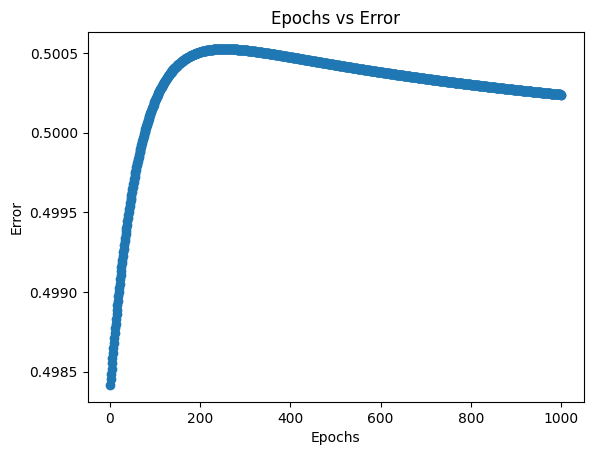

In [11]:
#A7)Neural Network using Back-Propagation for AND Gate Logic
# Initialize weights randomly
input_layer_size = 2
hidden_layer_size = 3
output_layer_size = 1

hidden_weights = np.random.rand(input_layer_size, hidden_layer_size)
output_weights = np.random.rand(hidden_layer_size, output_layer_size)

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training the neural network with back-propagation
epochs = 1000
errors = []

for epoch in range(epochs):
    # Forward propagation
    hidden_input = np.dot(X, hidden_weights)
    hidden_output = sigmoid(hidden_input)
    output = sigmoid(np.dot(hidden_output, output_weights))

    # Backpropagation
    output_error = y_xor.reshape(-1, 1) - output
    output_delta = output_error * sigmoid_derivative(output)

    hidden_layer_error = output_delta.dot(output_weights.T)
    hidden_layer_delta = hidden_layer_error * sigmoid_derivative(hidden_output)

    # Update weights
    output_weights += hidden_output.T.dot(output_delta) * learning_rate
    hidden_weights += X.T.dot(hidden_layer_delta) * learning_rate

    # Calculate total error
    total_error = np.mean(np.abs(output_error))
    errors.append(total_error)

    # Check for convergence
    if total_error <= 0.002:
        print(f"Converged after {epoch} epochs.")
        break

# Plotting epochs against error values
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs Error')
plt.show()


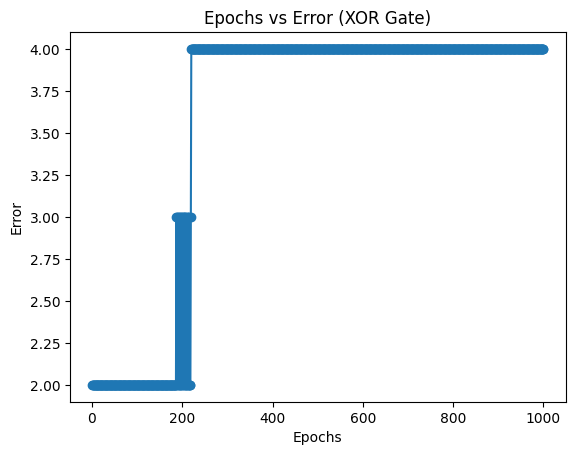

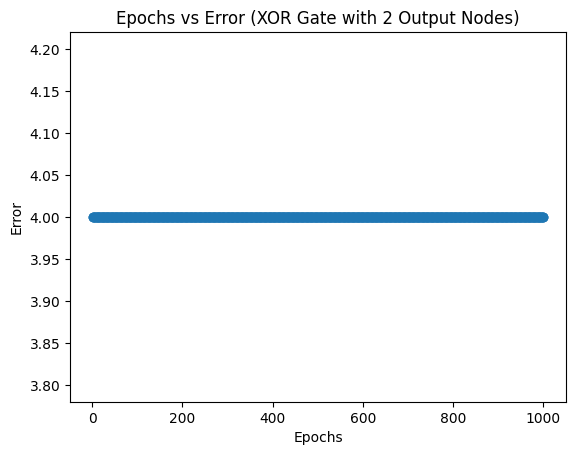

In [12]:
#A8)Perceptron for XOR Gate Logic
import numpy as np
import matplotlib.pyplot as plt

# XOR gate input data
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

# Initial weights
W0, W1, W2 = 10, 0.2, -0.75
learning_rate = 0.05

# Step activation function
def step_function(x):
    return 1 if x > 0 else 0

# Training the perceptron
epochs = 1000
errors = []

for epoch in range(epochs):
    total_error = 0
    for i in range(len(X_xor)):
        # Calculate the predicted output
        predicted = step_function(W0 * X_xor[i, 0] + W1 * X_xor[i, 1] + W2)

        # Update weights
        error = y_xor[i] - predicted
        total_error += error ** 2
        W0 += learning_rate * error * X_xor[i, 0]
        W1 += learning_rate * error * X_xor[i, 1]
        W2 += learning_rate * error

    errors.append(total_error)

    # Check for convergence
    if total_error == 0:
        print(f"Converged after {epoch} epochs.")
        break

# Plotting epochs against error values
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs Error (XOR Gate)')
plt.show()
#A9) Perceptron with 2 Output Nodes for XOR Gate Logic
import numpy as np
import matplotlib.pyplot as plt

# XOR gate input data
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([[1, 0], [0, 1], [0, 1], [1, 0]])

# Initial weights
W0, W1, W2 = 10, 0.2, -0.75
learning_rate = 0.05

# Step activation function
def step_function(x):
    return 1 if x > 0 else 0

# Training the perceptron
epochs = 1000
errors = []

for epoch in range(epochs):
    total_error = 0
    for i in range(len(X_xor)):
        # Calculate the predicted output for both nodes
        node1 = step_function(W0 * X_xor[i, 0] + W1 * X_xor[i, 1] + W2)
        node2 = 1 - node1

        # Update weights for node 1
        error1 = y_xor[i, 0] - node1
        total_error += error1 ** 2
        W0 += learning_rate * error1 * X_xor[i, 0]
        W1 += learning_rate * error1 * X_xor[i, 1]
        W2 += learning_rate * error1

        # Update weights for node 2
        error2 = y_xor[i, 1] - node2
        total_error += error2 ** 2
        W0 += learning_rate * error2 * X_xor[i, 0]
        W1 += learning_rate * error2 * X_xor[i, 1]
        W2 += learning_rate * error2

    errors.append(total_error)

    # Check for convergence
    if total_error == 0:
        print(f"Converged after {epoch} epochs.")
        break

# Plotting epochs against error values
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs Error (XOR Gate with 2 Output Nodes)')
plt.show()


In [13]:
#A10)Repeat the AND Gate and XOR Gate exercises using MLPClassifier() function.
from sklearn.neural_network import MLPClassifier

# XOR gate input data
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

# Create MLP model
mlp_xor = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=1000, learning_rate_init=0.05, random_state=42)

# Train the model
mlp_xor.fit(X_xor, y_xor)

# Test the model
predictions_xor = mlp_xor.predict(X_xor)
print("Predictions for XOR gate logic using MLPClassifier:")
print(predictions_xor)


Predictions for XOR gate logic using MLPClassifier:
[0 1 1 0]
